<hr style="border:2px solid gray"> </hr>
<img src="https://mma.prnewswire.com/media/1095203/East_Tennessee_State_University_Logo.jpg?p=facebook" width=200 height=200 />

<div class="alert alert-block alert-info">
    <h1 style="text-align: center">CSCI 5270 - Machine Learning</h1>
</div>

# <center>Lab 5 - Unsupervised Learning - K-Means Clustering with Principal Component Analysis</center>

**<center>Dr. Ahmad Al-Doulat </center>**
<center>Department of Computing </center>
<center>East Tennessee State University</center>

<hr style="border:2px solid lightblue"> </hr>

**In this assignment, you'll get to practice the concepts and skills covered in the course so far. The main objective of this assignment is to implement two K-Means clustering models- with and without the use of Principal Component Analysis (PCA)**



**Guidelines**
* Download `WineData.csv` files from D2L. 
* Make sure to run all the code cells, otherwise you may get errors like `NameError` for undefined variables.
* Do not change variable names, delete cells or disturb other existing code. It may cause problems during evaluation.
* In some cases, you may need to add some code cells or new statements before or after the line of code containing the `???`.
* Use markdown cells to write your discussions and reflections. 

**Procedure**
* Save your work as `IPYNB` file and submit to D2L `Lab 5 - Unsupervised Learning - K-Means Clustering with Principal Component Analysis (Dropbox)` by the due date.
* As you go through this notebook, you will find the symbol `???` in certain places. To complete this assignment, you must replace all the `???` with appropriate values, expressions or statements to ensure that the notebook runs properly end-to-end.
* Include your response for `Part 1` and `Part 2` in this notebook. 

<div class="alert alert-block alert-info">

# Part 1: Activity 

</div>

#### Read the content of the `WineData.csv` file into a dataset and perform the following:

> **Q1.1.** Visualize the dataset

> **Q1.2.** Discuss the preliminary observations about the dataset. You may base your discussion on your visualizations, measures of central tendency, and measures of variability 

> **Q1.3.** Build a clustering model using K-Means clustering algorithm to segment the wines based on all columns in the dataset.  

> **Q1.4.** Based on the clustering on Q1.3, describe some characteristics of each cluster

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
%matplotlib inline

sns.set_style('darkgrid')
sns.set_palette('Set2')

In [2]:
dataset = pd.read_csv('WineData.csv')
dataset.shape

(178, 13)

In [3]:
dataset.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


**Preprocessing the dataset:**

In [4]:
dataset.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

**No any missing data**

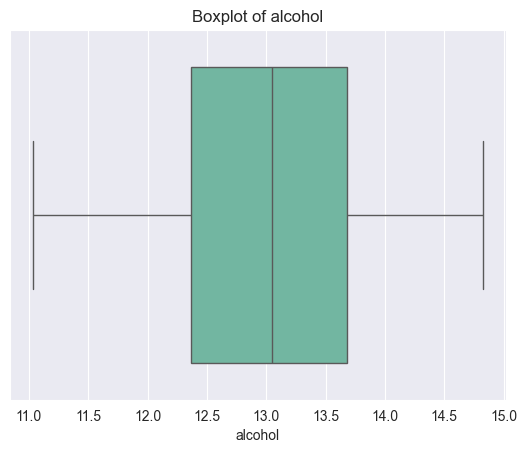

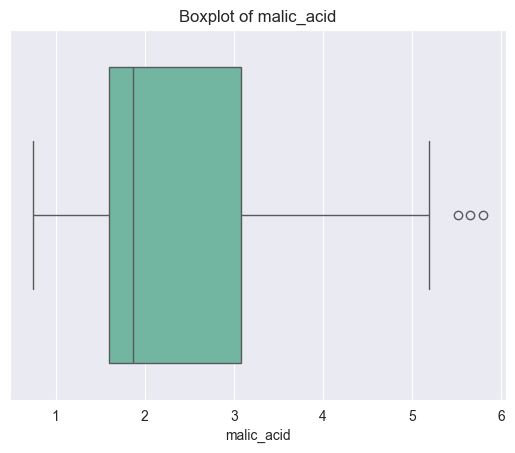

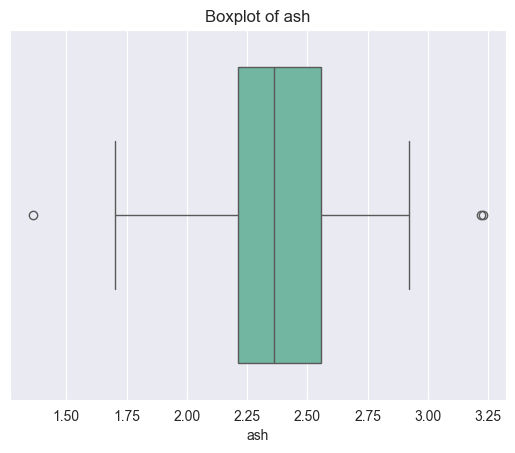

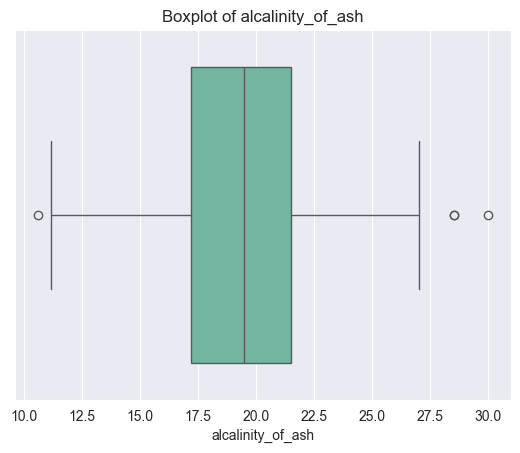

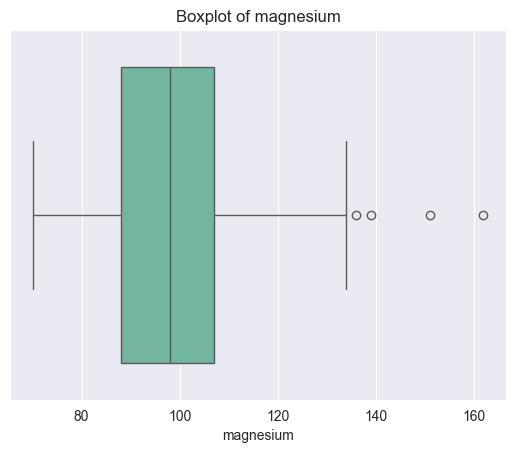

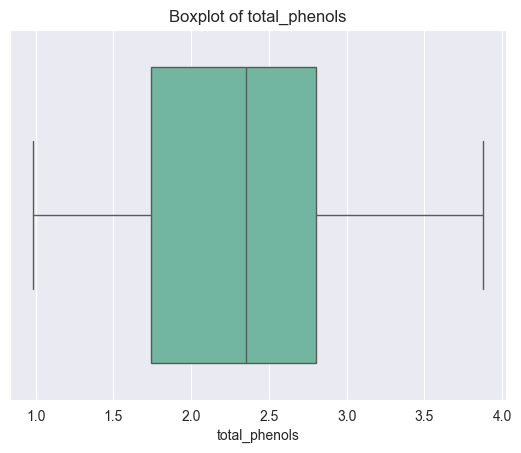

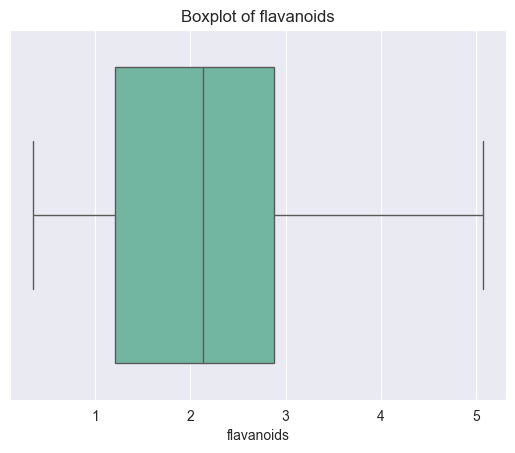

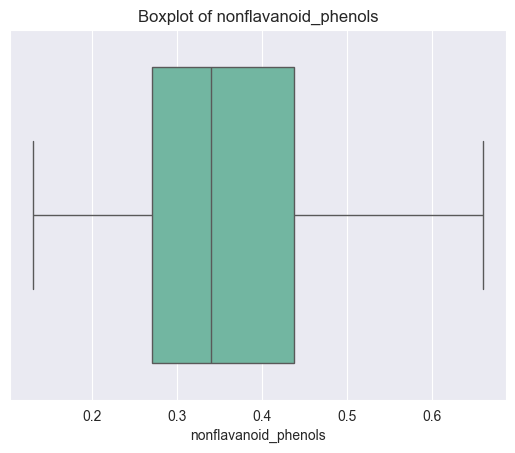

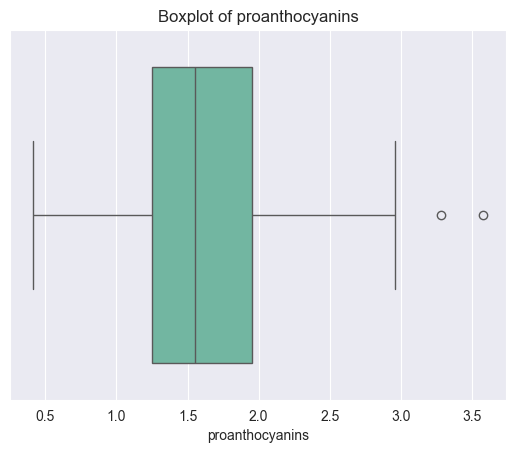

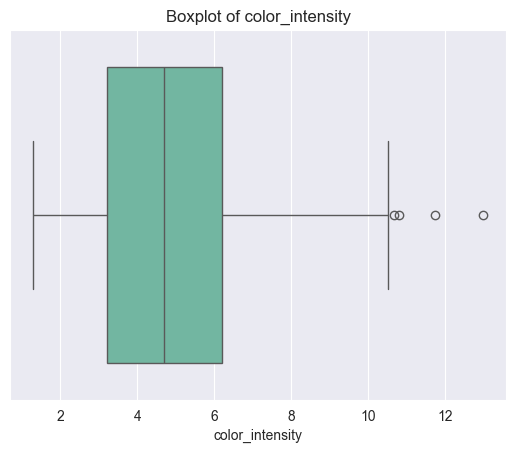

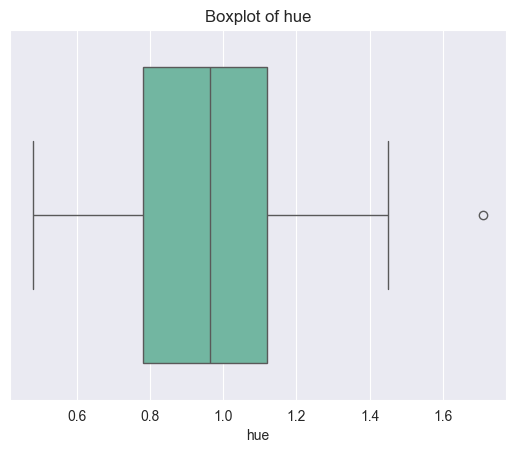

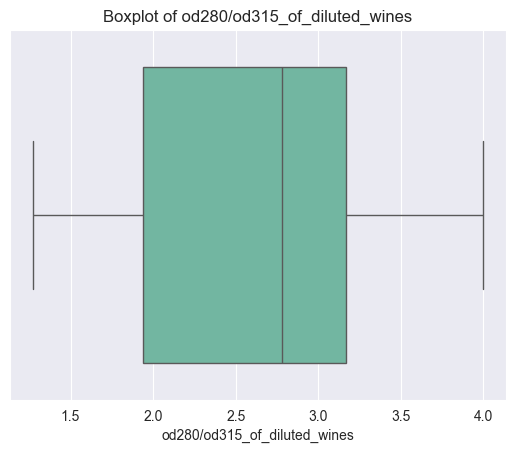

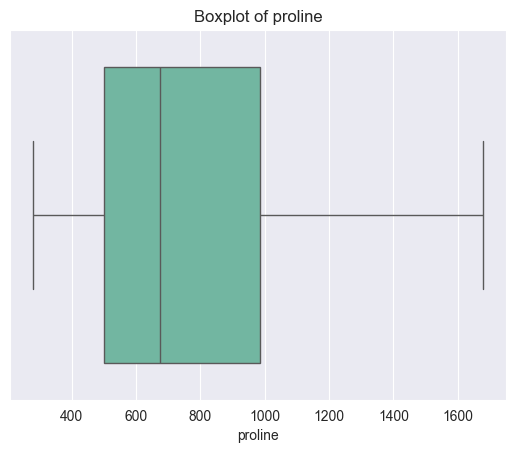

In [5]:
for column in dataset.columns:
    sns.boxplot(x=dataset[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

**Very few outliers, so we are not removing them as they have a possibility of being grouped into a separate cluster.**

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

**Didn't find any unnecessary data, inconsistent data, or categorical data.**

**Q1.1. Visualize the dataset**

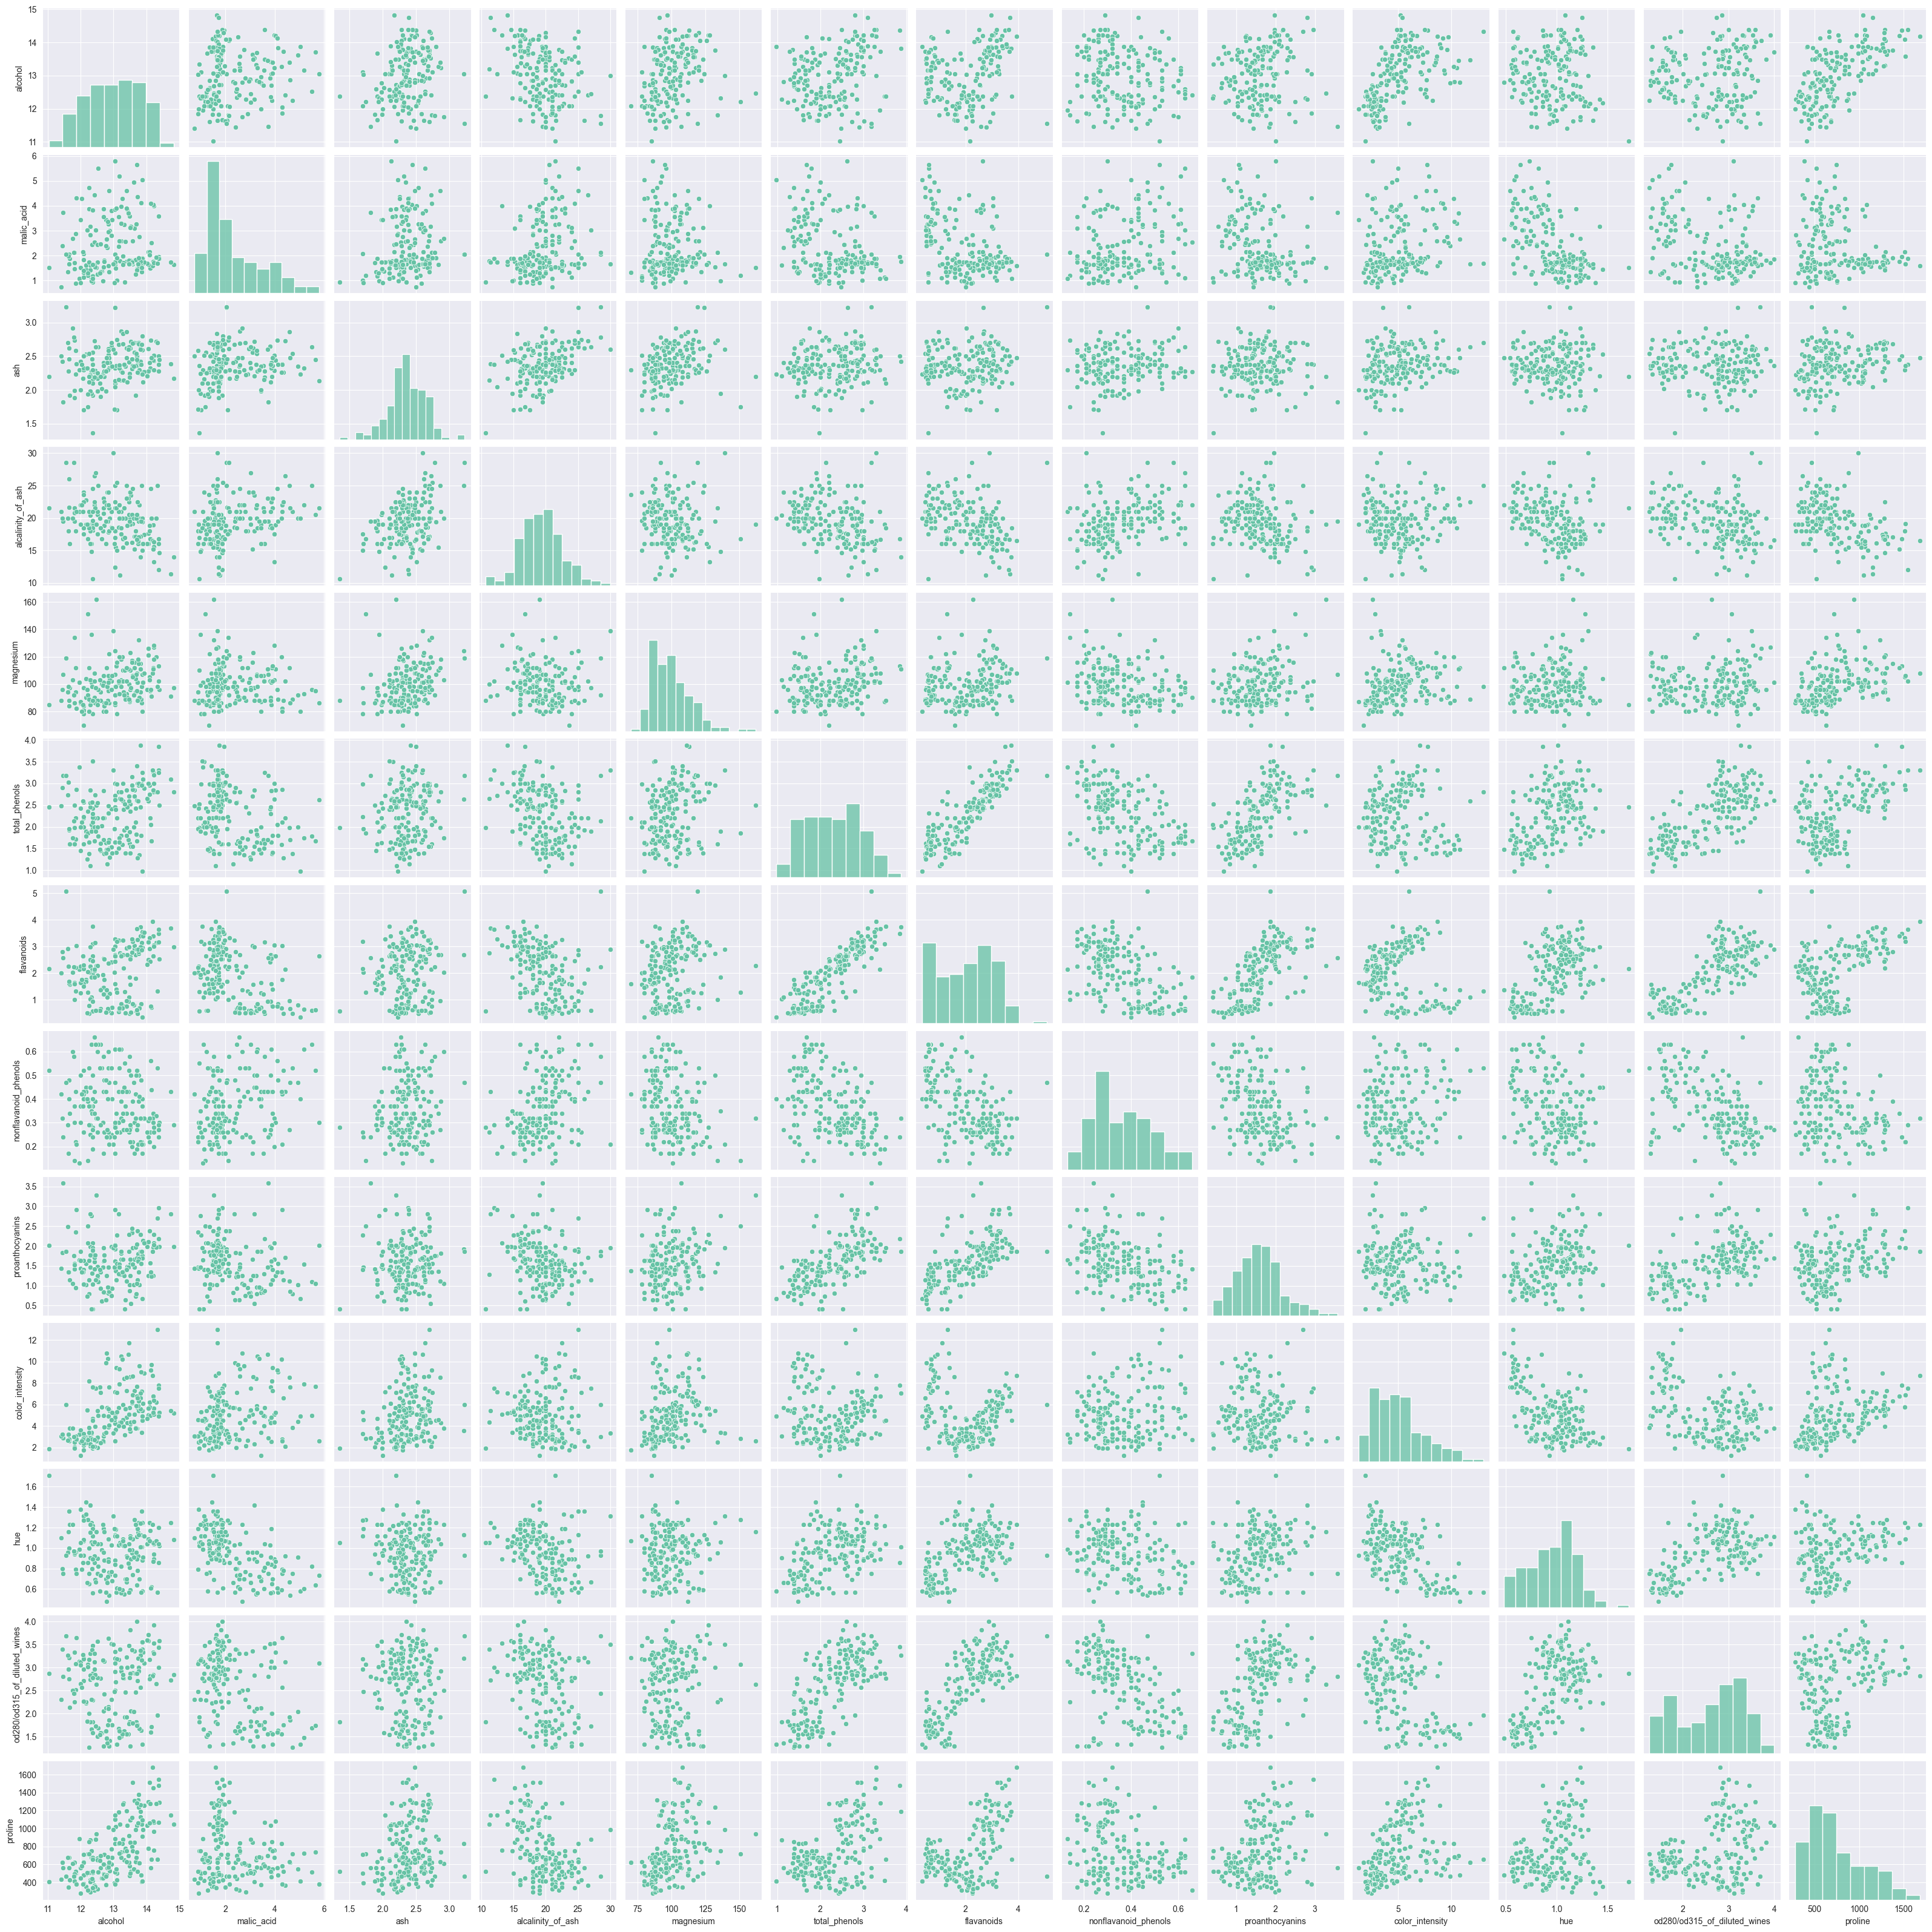

In [7]:
# Scatter Plots
sns.pairplot(dataset)

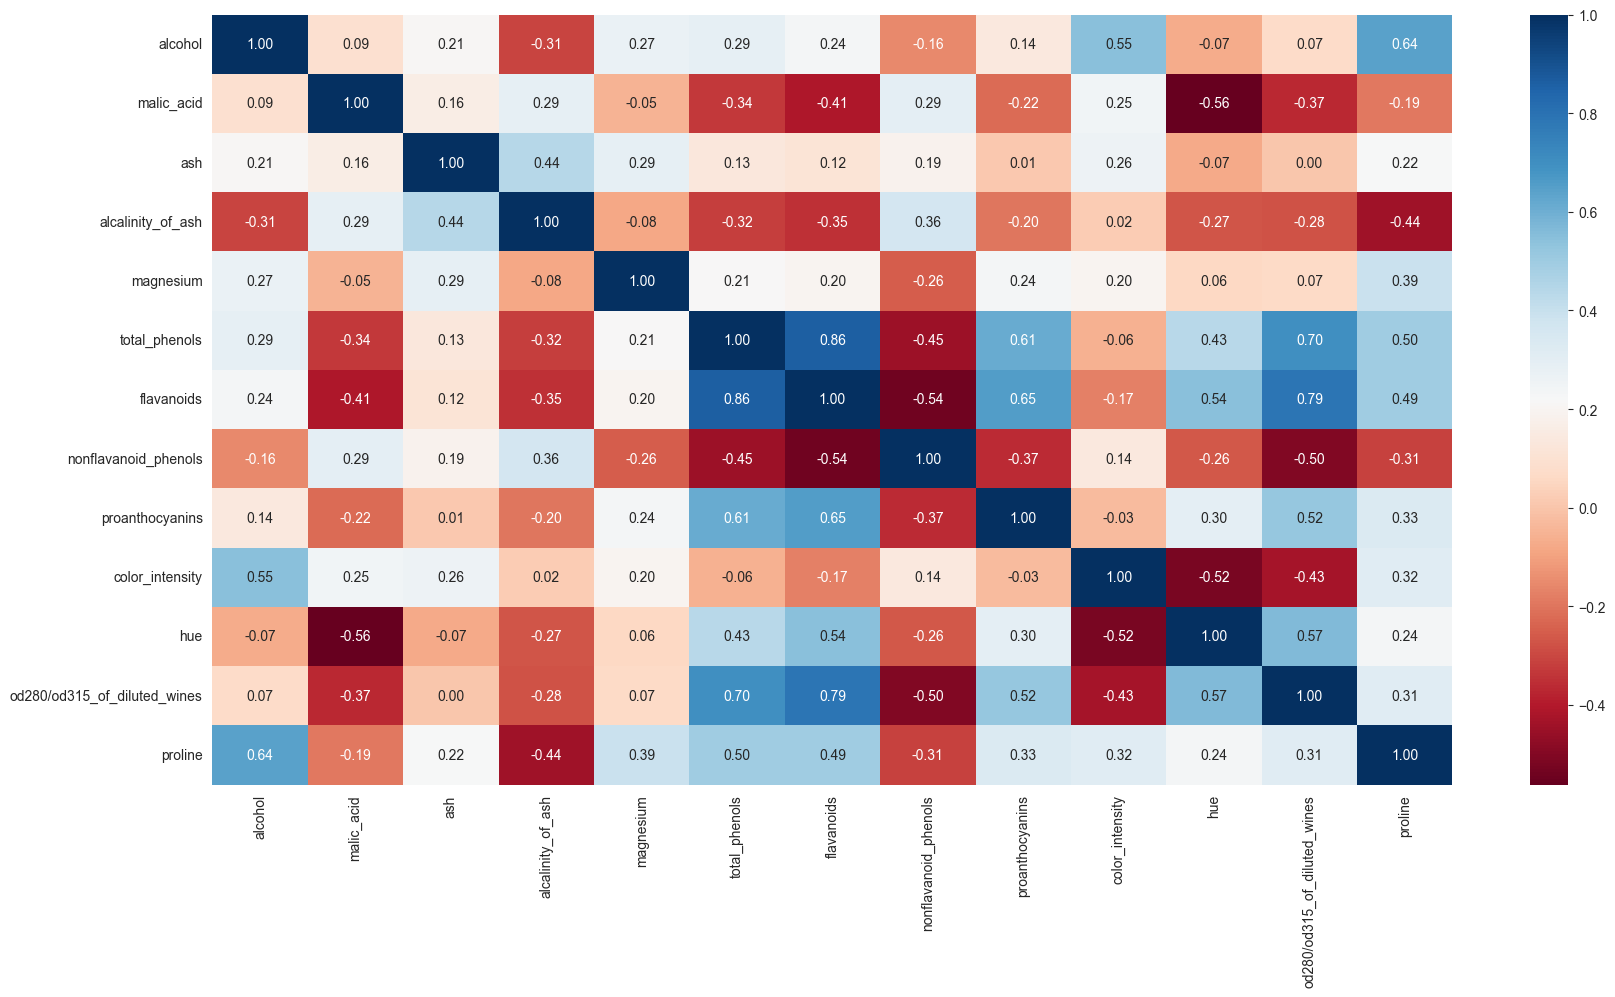

In [8]:
# Heatmap
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(dataset.corr(), cmap='RdBu', annot=True, fmt=".2f");

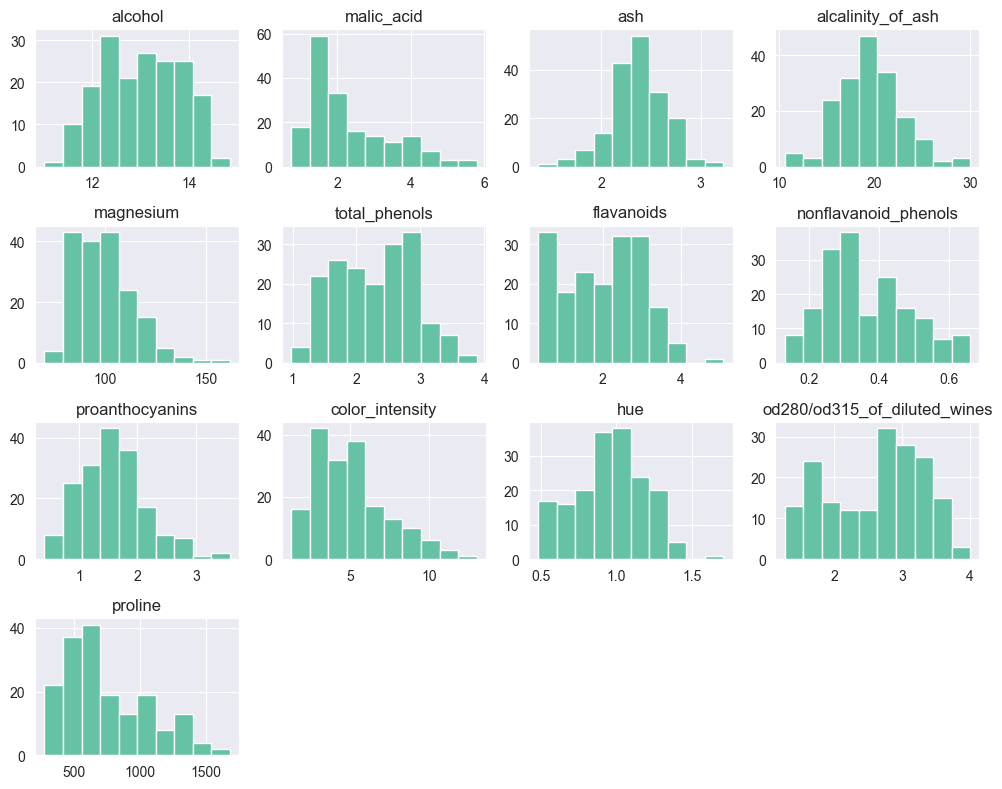

In [9]:
# Histograms
dataset.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

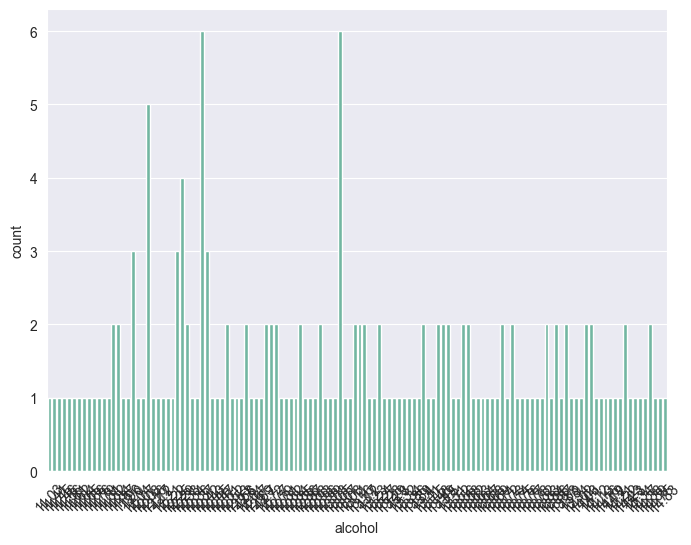

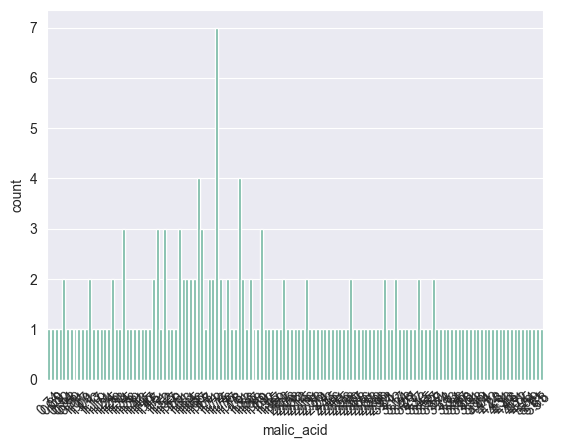

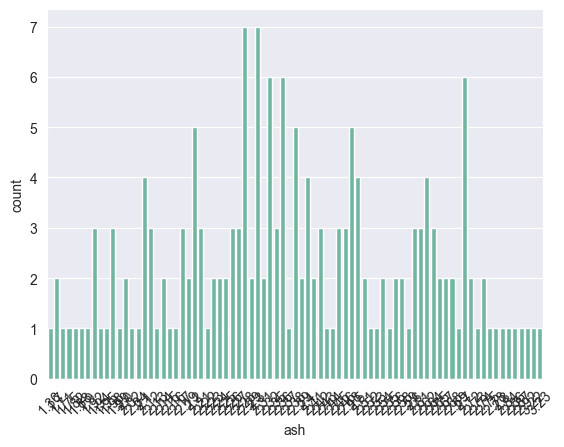

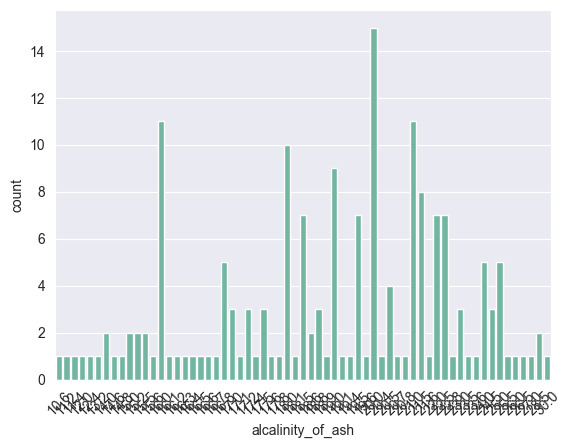

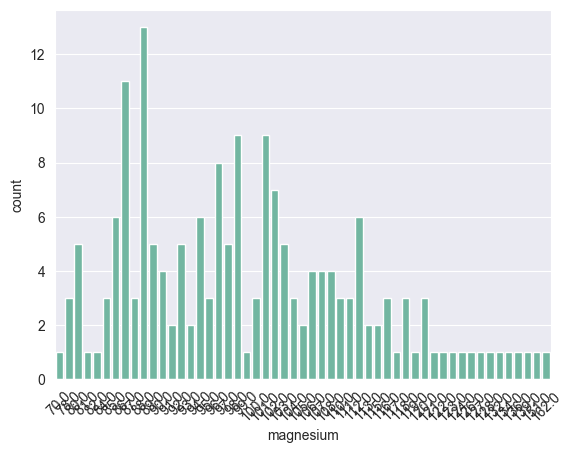

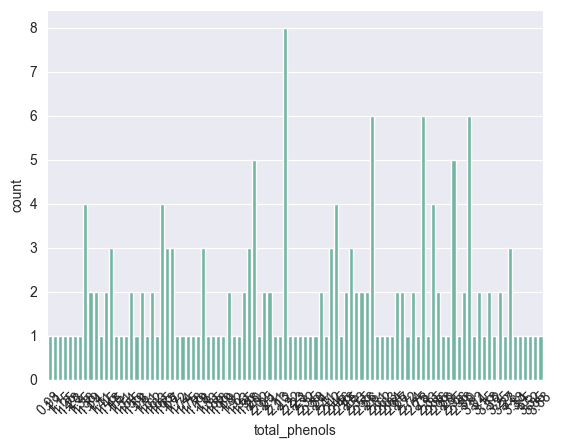

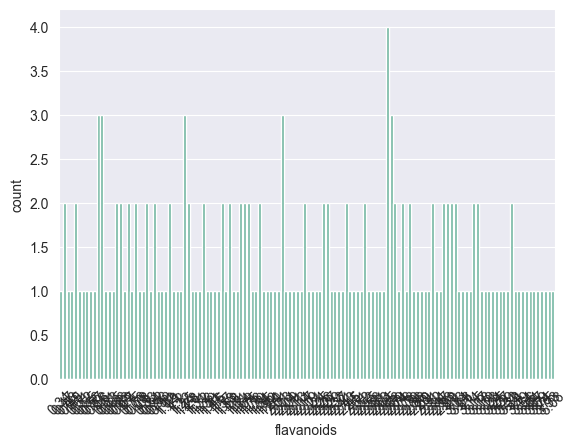

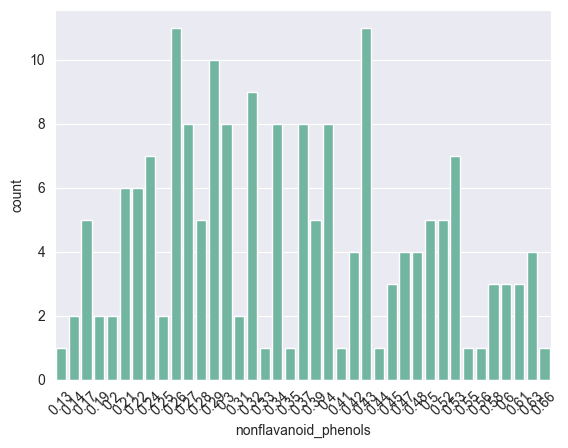

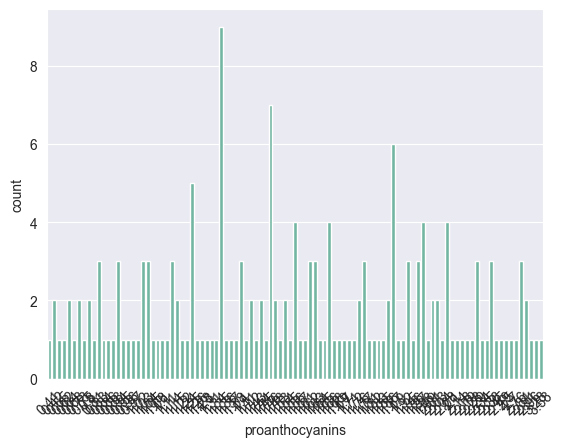

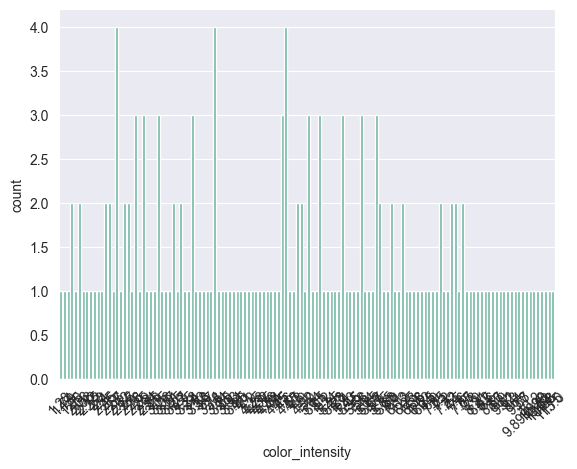

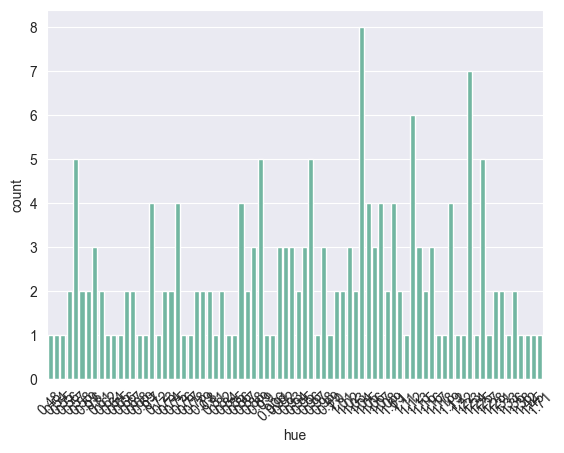

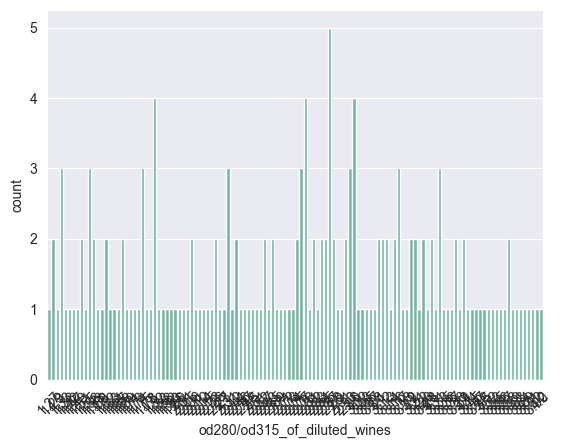

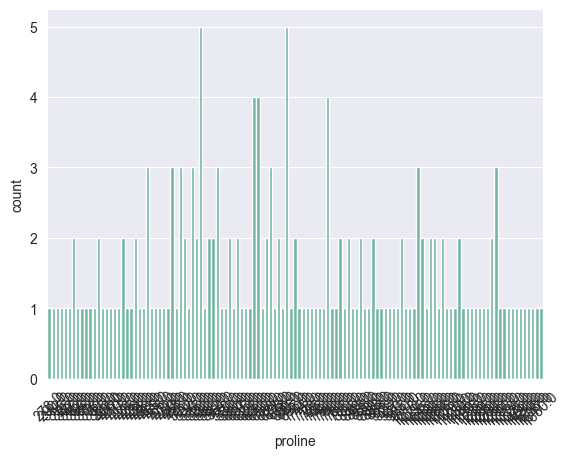

In [10]:
# Bar Charts
plt.figure(figsize=(8, 6))
for column in dataset.columns:
    sns.countplot(x=column, data=dataset)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

**Q1.2. Discuss the preliminary observations about the dataset. You may base your discussion on your visualizations, measures of central tendency, and measures of variability**

In [11]:
dataset.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


**Answer:** The 'WineData.csv' file consists of 178 samples of wine data, with 13 different wine properties as its columns. The data is clean, which does not require any preprocessing steps, as there are no missing values, few outliers (which could be grouped as a separate cluster), no unnecessary or inconsistent data, and all columns have a data type of float64. This indicates that there is no categorical data, and encoding is not required.

From the histogram diagram, we observe that almost all data seems to be zero-skewed, indicating an almost symmetric distribution, except for 'malic_acid', 'magnesium', 'color_intensity', and 'proline'. These four columns appear to be positively skewed (or right-skewed), as the data are predominantly clustered around the left tail of the graph, with a longer right tail. The mean and median values of these data further confirm this, with the mean value being greater than the median value.

Additionally, attributes such as 'alcalinity_of_ash', 'magnesium', 'color_intensity', and 'proline' shows relatively high standard deviations, indicating a wider spread of values around their means compared to other attributes.

**Standardizing the Dataset**

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

dataset_scaled = scaler.fit_transform(dataset)
dataset_scaled.shape

(178, 13)

In [13]:
dataset_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

**Q1.3. Build a clustering model using K-Means clustering algorithm to segment the wines based on all columns in the dataset.**

In [14]:
from sklearn.cluster import KMeans
variations = []
range_n_clusters = range(1,15)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dataset_scaled)
    
    variations.append(kmeans.inertia_)

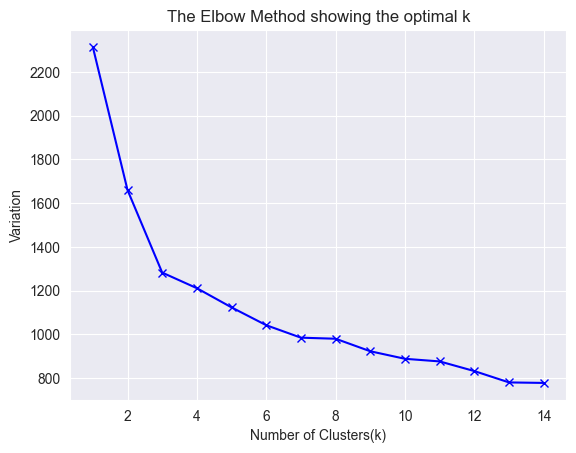

In [15]:
plt.plot(range_n_clusters, variations, 'bx-')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Variation')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [16]:
# Silhouette analysis
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,15)

optimal_num_clusters = 0
max_silhouette_score = 0

for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dataset_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(dataset_scaled, cluster_labels)
    
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    if silhouette_avg > max_silhouette_score:
        max_silhouette_score = silhouette_avg
        optimal_num_clusters=num_clusters
    
print("\nOptimal number of clusters = {}".format(optimal_num_clusters))

For n_clusters=2, the silhouette score is 0.2596521860778704
For n_clusters=3, the silhouette score is 0.2848589191898987
For n_clusters=4, the silhouette score is 0.2756904520342413
For n_clusters=5, the silhouette score is 0.24388906280136935
For n_clusters=6, the silhouette score is 0.16731077943471837
For n_clusters=7, the silhouette score is 0.13720576383716934
For n_clusters=8, the silhouette score is 0.14771139611328063
For n_clusters=9, the silhouette score is 0.1553001378323126
For n_clusters=10, the silhouette score is 0.14155791260173364
For n_clusters=11, the silhouette score is 0.14161308626475788
For n_clusters=12, the silhouette score is 0.13841048582379628
For n_clusters=13, the silhouette score is 0.13593608697505927
For n_clusters=14, the silhouette score is 0.13112295717005396

Optimal number of clusters = 3


In [17]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(dataset_scaled)

KMeans(max_iter=50, n_clusters=3)

In [18]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [19]:
dataset['km_clusters'] = kmeans.labels_

In [20]:
dataset.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,km_clusters
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,1
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,1
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,1
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,1
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,1


Text(0.5, 0.98, 'Cluster Analysis')

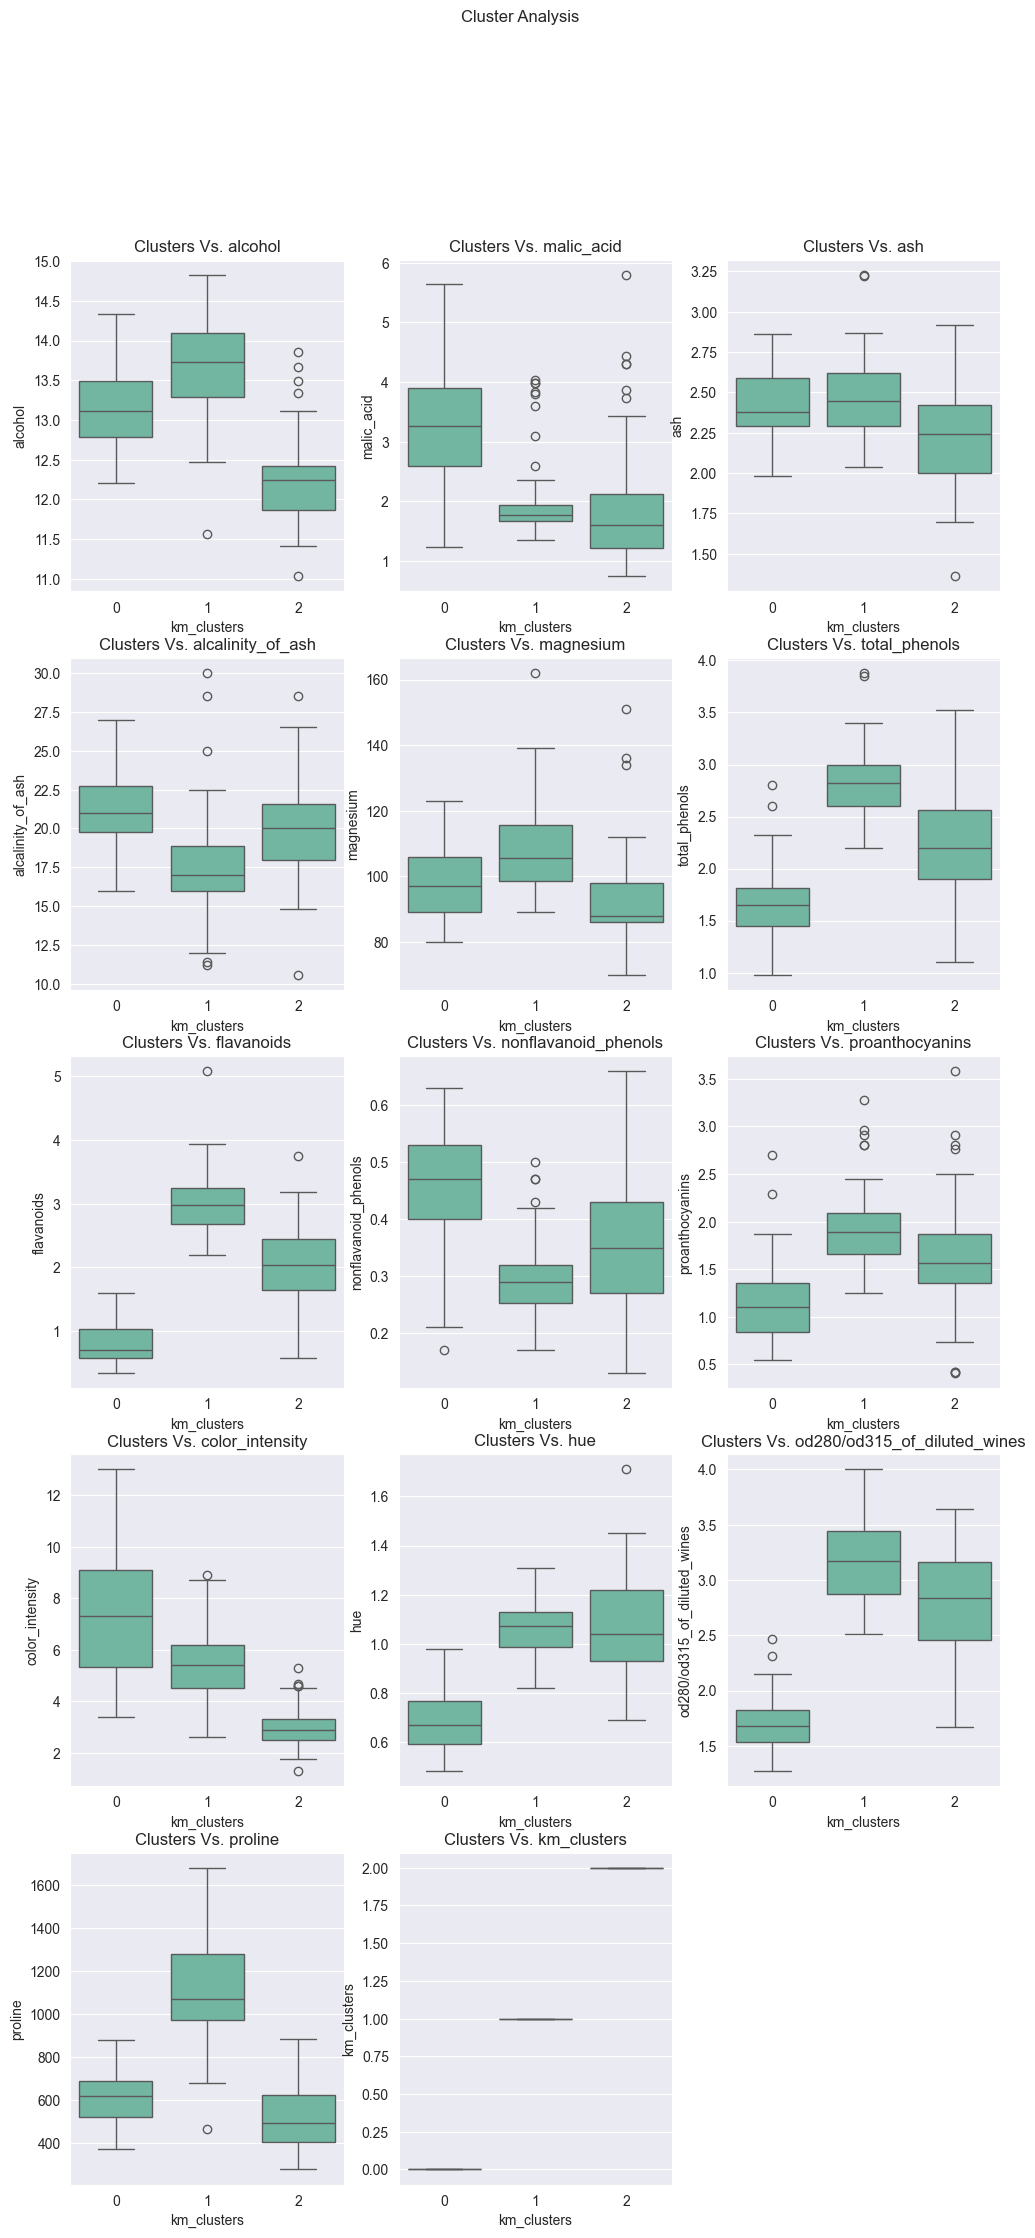

In [21]:
plt.figure(figsize=(12, 5*5))

for i, column in enumerate(dataset.columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x='km_clusters', y=column, data=dataset)
    plt.title(f'Clusters Vs. {column}')

plt.suptitle('Cluster Analysis')

**Q1.4. Based on the clustering on Q1.3, describe some characteristics of each cluster**

In [22]:
dataset['km_clusters'].value_counts()

km_clusters
2    65
1    62
0    51
Name: count, dtype: int64

**Answer:** 

*Cluster 0:*
1. Cluster 0 consists of 51 samples of wine data.
2. It shows moderate values across various characteristics.
3. It has moderate 'alcohol' content.
4. It has higher 'malic_acid' and 'nonflavanoid_phenols'.
5. It has lower 'flavanoids'.
   
*Cluster 1:*
1. Cluster 1 consists of 62 samples of wine data.
2. It exhibits lower values in most features compared to the other clusters.
3. It consists of low 'malic_acid' and 'alcalinity_of_ash'.
4. It has the highest 'proline' among the clusters.

*Cluster 2:*
1. Cluster 2 consists of 65 samples of wine data.
2. It often exhibits higher values in several features.
3. It consists of a wide range of 'total_phenols', and  'flavanoids'.
4. It has a lower proline level.

# Question 2: Principal Component Analysis
<hr style="border:1px solid orange"> </hr>

#### Read the content of the `WineData.csv` file into a dataset and perform the following:

> **Q2.1.** Using PCA, reduce the dimensionality of the dataset into the appropriate number of components

> **Q2.2.** Build a clustering model using K-Means clustering algorithm to segment the wines based on principal components obtained in Q2.1.  

> **Q2.3.** Based on the clustering on Q2.2, describe some characteristics of each cluster

**Q2.1. Using PCA, reduce the dimensionality of the dataset into the appropriate number of components**

In [23]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(dataset_scaled)

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [24]:
pca.n_components_

13

In [25]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

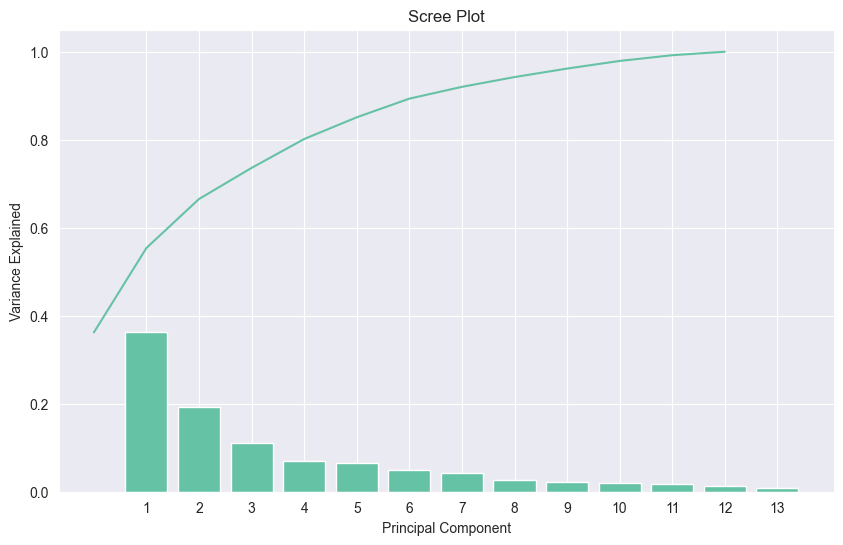

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(range(1, pca.n_components_+1), pca.explained_variance_ratio_)
plt.xticks(range(1, pca.n_components_+1))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [27]:
# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Choose the number of components that capture a specified percentage of variance
target_variance = 0.90  # Set your desired percentage here (e.g., 0.95 or 0.99)
num_components = np.argmax(cumulative_variance >= target_variance) + 1

print(f'The number of components to capture {target_variance * 100}% variance: {num_components}')

The number of components to capture 90.0% variance: 8


In [28]:
pca = PCA(n_components=num_components)
scores = pca.fit_transform(dataset_scaled)

In [29]:
components = pca.components_.T
reduced_df = pd.DataFrame(scores, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])
reduced_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700
...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829


**Q2.2. Build a clustering model using K-Means clustering algorithm to segment the wines based on principal components obtained in Q2.1.**

In [30]:
variations = []
range_n_clusters = range(1,15)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(reduced_df)
    
    variations.append(kmeans.inertia_)

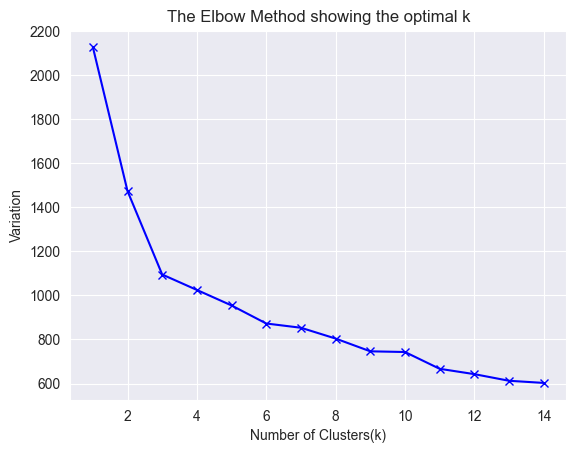

In [31]:
plt.plot(range_n_clusters, variations, 'bx-')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Variation')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [32]:
# Silhouette analysis
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,15)

optimal_num_clusters = 0
max_silhouette_score = 0

for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(reduced_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(reduced_df, cluster_labels)
    
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    if silhouette_avg > max_silhouette_score:
        max_silhouette_score = silhouette_avg
        optimal_num_clusters=num_clusters
    
print("\nOptimal number of clusters = {}".format(optimal_num_clusters))

For n_clusters=2, the silhouette score is 0.2893558665663297
For n_clusters=3, the silhouette score is 0.31496969547055637
For n_clusters=4, the silhouette score is 0.24277861545648438
For n_clusters=5, the silhouette score is 0.23180580063104955
For n_clusters=6, the silhouette score is 0.15043922815108562
For n_clusters=7, the silhouette score is 0.1952205644883762
For n_clusters=8, the silhouette score is 0.1977749455918256
For n_clusters=9, the silhouette score is 0.2140316557242272
For n_clusters=10, the silhouette score is 0.13564165361716207
For n_clusters=11, the silhouette score is 0.16167071188177753
For n_clusters=12, the silhouette score is 0.15116418976696697
For n_clusters=13, the silhouette score is 0.1480433164182441
For n_clusters=14, the silhouette score is 0.150325759525794

Optimal number of clusters = 3


In [33]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(reduced_df)

KMeans(max_iter=50, n_clusters=3)

In [34]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [35]:
dataset['pca_km_clusters'] = kmeans.labels_

In [36]:
dataset.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,km_clusters,pca_km_clusters
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,1,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,1,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,1,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,1,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,1,0


Text(0.5, 0.98, 'Cluster Analysis')

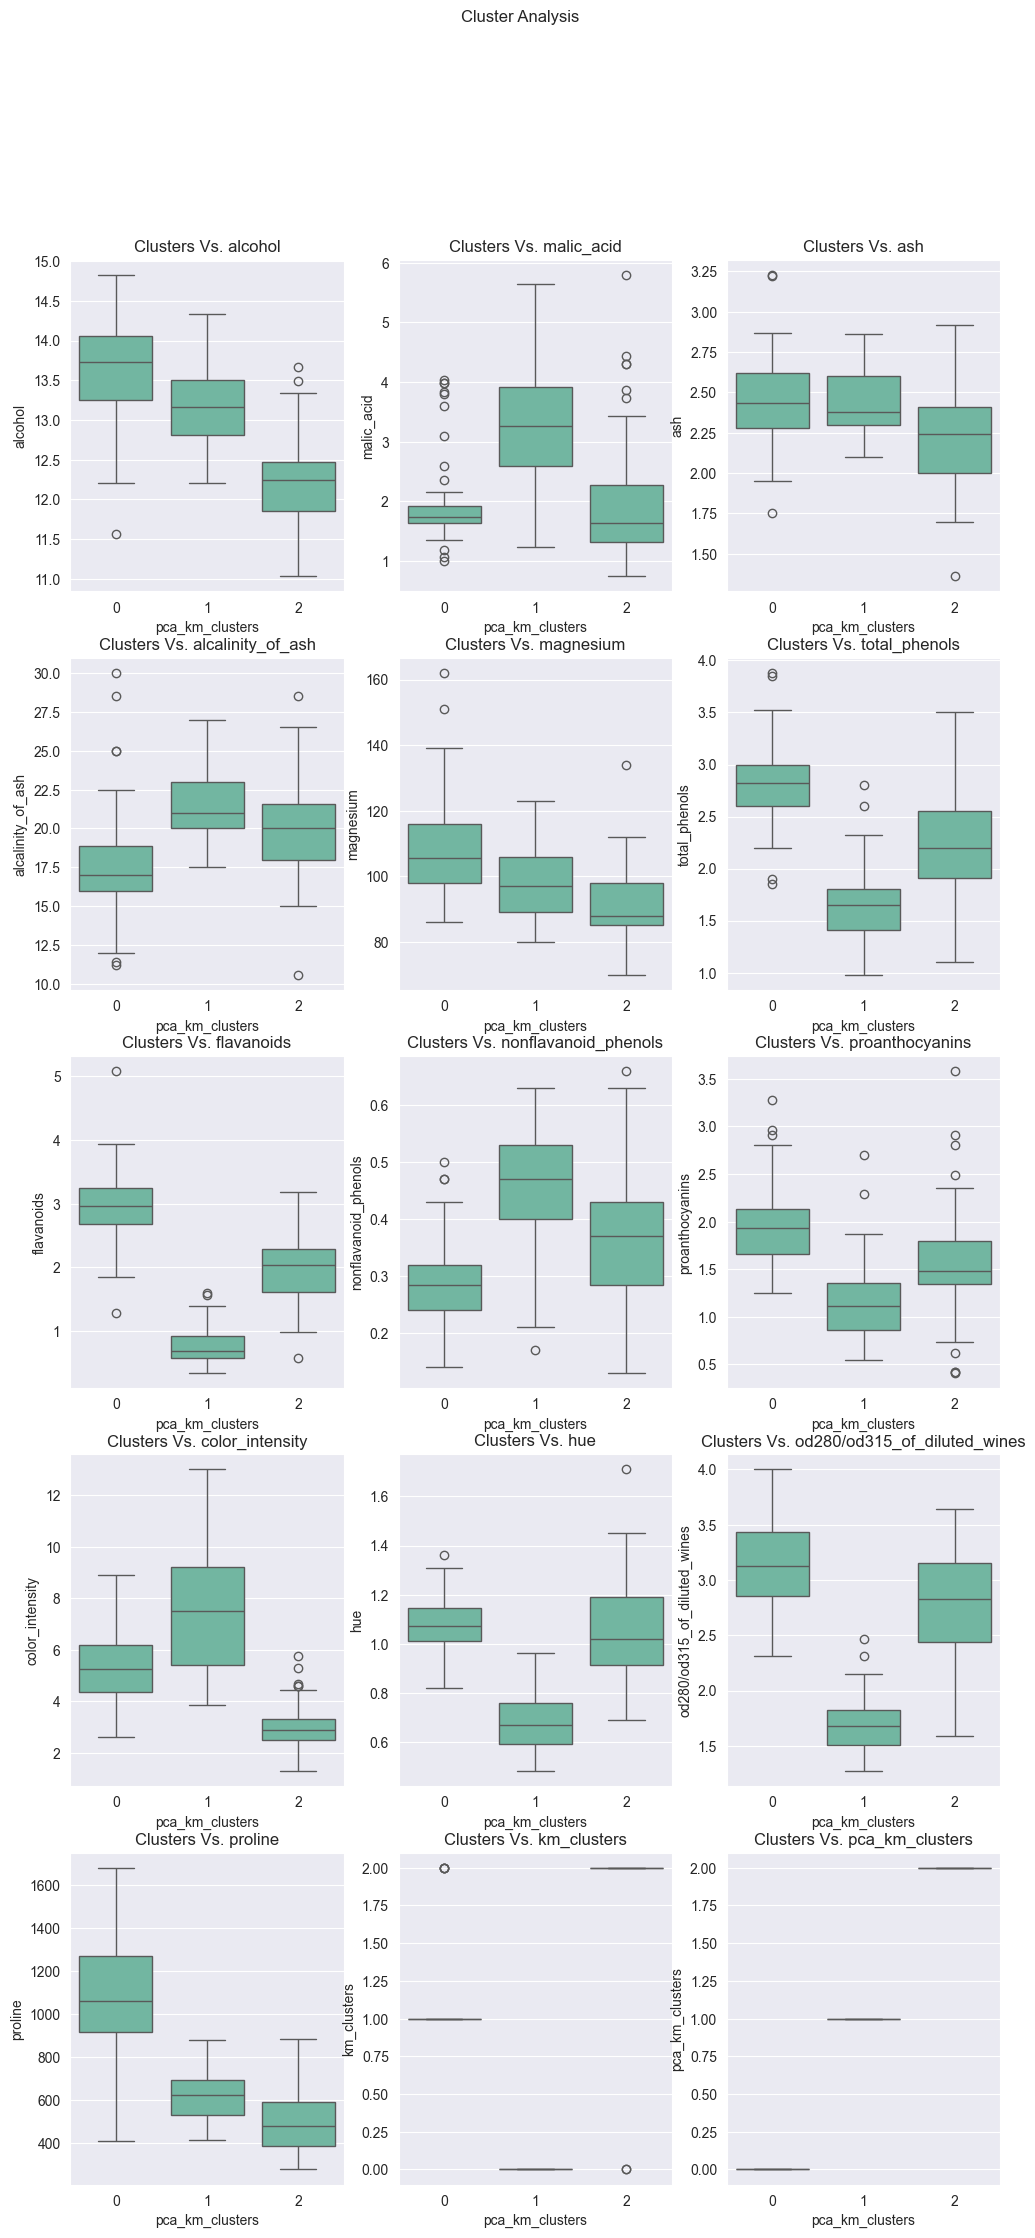

In [37]:
plt.figure(figsize=(12, 5*5))

for i, column in enumerate(dataset.columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x='pca_km_clusters', y=column, data=dataset)
    plt.title(f'Clusters Vs. {column}')

plt.suptitle('Cluster Analysis')

**Q2.3. Based on the clustering on Q2.2, describe some characteristics of each cluster**

In [38]:
dataset['km_clusters'].value_counts()

km_clusters
2    65
1    62
0    51
Name: count, dtype: int64

In [39]:
dataset['pca_km_clusters'].value_counts()

pca_km_clusters
0    66
2    63
1    49
Name: count, dtype: int64

**Answer:**

*Cluster 0:*
1. Cluster 0 consists of 66 samples of wine data.
2. The wines of cluster 0 have higher alcohol content.
3. These wines contain lower levels of malic_acid.
4. They have a lower alkalinity_of_ash compared to other clusters.
5. They have higher magnesium content.
6. They have moderately high total_phenols.
7. They have high flavanoid levels.
8. They have low nonflavanoid_phenols.
9. They have a higher hue, indicating more vibrant color or flavor profiles in wines associated with this cluster.
10. They have the highest proline content.
   
*Cluster 1:*
1. Cluster 1 consists of 49 samples of wine data.
2. They have moderate alcohol content i.e. lower than Cluster 0 and higher than Cluster 2.
3. They have high malic_acid levels with high variance.
4. They have the lowest total_phenols and flavanoids compared to all three clusters.
5. They have the highest nonflavanoid_phenols.
6. They have the lowest proanthocyanins and hue.

*Cluster 2:*
1. Cluster 2 consists of 63 samples of wine data.
2. They consist of the lowest alcohol content among the three clusters.
3. They have lower ash content.
4. They have the lowest color_intensity with low variance.

We have reduced the dimension of our wine dataset from 13 to 8 with very few compromises in accuracy, but having a huge advantage in terms of cost. Although we had discarded 5 dimensions, the number of samples in each cluster before and after implementing PCA is almost identical with 1 or 2 samples being shuffled.

<div class="alert alert-block alert-info">

# Part 2: Reflection
    
</div>

As a second step—after answering the questions, include the following:
1. A reflection of your experience performing the activity. 
2. A reflection on the importance of learning this activity.

**Note:** include your reflection in this notebook as markdown cells. 

**Answer:**
1. This lab is mainly focused on the content we have studied in Week 7 i.e. Dimensionality Reduction Using PCA. So, the lab could have just focused on the PCA algorithm, but it contains the example of clustering as well, which was covered in our last lecture class before Week 7. This has helped us to revise the concept of clustering as well, and we got to learn more about how practically the dimensionality reduction algorithm is used. Additionally, a classification algorithm with PCA was used in the class demonstration. This lab has clarified the concept of ML algorithms covered so far.

2. The real-world data consists of thousands of features and not all of them contribute to our goal of discovering patterns or trends or predicting future values. Instead of helping us or the Machine Learning Algorithms to solve the problem, it creates a burden in terms of time and space complexities. To get the work done with high efficiency and less to no deviation in our accuracy, we can use the concept of dimensionality reduction. This will help us to reduce the number of features, which ultimately reduces the complexities.

<div class="alert alert-block alert-info">

# Submission
    
</div>

Submit **Lab5.ipynb** to the **Lab 5 - Unsupervised Learning - K-Means Clustering with Principal Component Analysis (Dropbox)** on D2L by the due date. 

<div class="alert alert-block alert-info">

# Grading Rubric
    
</div>

| Criterion                                 | Excellent                                               | Good                                                  | Average                                                | Below Average                                          | Poor                                                  | No Attempt                                            |
| ----------------------------------------- | ------------------------------------------------------- | ------------------------------------------------------ | ------------------------------------------------------ | ------------------------------------------------------- | ------------------------------------------------------ | ------------------------------------------------------ |
| **Part 1:** Activity-Question 1.1          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 1.2          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 1.3          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 1.4          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 2.1          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 2.2          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 2.3          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 2:** Reflection                    | **10 points**- Reflection clearly ties to the module content; experience and importance clearly laid out | **8 points**- Reflection mostly ties to the module content; experience & importance are discussed | **6 points**- Reflection ties minimally to the module content; experience & importance are discussed but not thoroughly | **4 points**- Reflection does not tie to the module content; experience & importance are minimally discussed | **2 points**- Minimal effort to tie to content; minimal effort to describe experience/ importance | **0 points**- Did not complete the reflection             |
